In [11]:
from keras.datasets import mnist

In [12]:
%env KERAS_BACKEND=tensorflow
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, Input, concatenate, add
from keras.optimizers import SGD
from keras.utils import np_utils

env: KERAS_BACKEND=tensorflow


## 神經網路圖

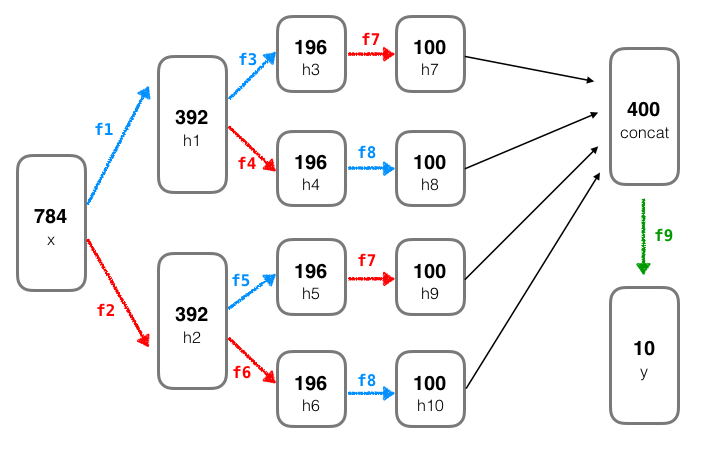

想要先分支兩次，每次都把維度減半(雖然應該是沒有什麼意義)，再將四個分支各運算一次，變成各 100 維的向量。最後 concat 起來利用隱藏層 f9 運算後得到 y。

顏色代表不同 activation function。 藍色代表 sigmoid，紅色代表 relu，綠色代表 softmax。我盡量讓不同 activation function 交錯，看看會不會得到比較好的成果。

## 定義隱藏層函數 

In [13]:
f1 = Dense(392, activation='sigmoid')
f2 = Dense(392, activation='relu')
f3 = Dense(196, activation='sigmoid')
f4 = Dense(196, activation='relu')
f5 = Dense(196, activation='sigmoid')
f6 = Dense(196, activation='relu')
f7 = Dense(100, activation='relu')
f8 = Dense(100, activation='sigmoid')
f9 = Dense(10, activation='softmax')


In [14]:
x = Input(shape=(784,))
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [15]:
y_train[2]

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

## 定義函數的作用

In [16]:
h1 = f1(x)
h2 = f2(x)
h3 = f3(h1)
h4 = f4(h1)
h5 = f5(h2)
h6 = f6(h2)
h7 = f7(h3)
h8 = f8(h4)
h9 = f7(h5)
h10 = f8(h6)
concat = concatenate([h7,h8,h9,h10])
y = f9(concat)

In [17]:
print(concat)
print(y)

Tensor("concatenate_2/concat:0", shape=(?, 400), dtype=float32)
Tensor("dense_18/Softmax:0", shape=(?, 10), dtype=float32)


### 檢查：層數、output 維度、參數數量

In [18]:
my_model = Model(x, y)
my_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 392)          307720      input_2[0][0]                    
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 392)          307720      input_2[0][0]                    
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 196)          77028       dense_10[0][0]                   
__________________________________________________________________________________________________
dense_13 (

### learning rate 一如往常的 0.87

In [19]:
my_model.compile(loss = 'mse', optimizer = SGD(lr=0.87), metrics = ['accuracy'])


## 開始訓練

In [21]:
my_model.fit(x_train, y_train, batch_size = 300, epochs = 30)


Epoch 1/30
60000/60000 [==============================] - 10s 168us/step - loss: 0.0225 - acc: 0.8706
Epoch 2/30
60000/60000 [==============================] - 11s 191us/step - loss: 0.0121 - acc: 0.9250
Epoch 3/30
60000/60000 [==============================] - 13s 218us/step - loss: 0.0094 - acc: 0.9417
Epoch 4/30
60000/60000 [==============================] - 12s 206us/step - loss: 0.0078 - acc: 0.9514
Epoch 5/30
60000/60000 [==============================] - 11s 185us/step - loss: 0.0068 - acc: 0.9582
Epoch 6/30
60000/60000 [==============================] - 11s 181us/step - loss: 0.0059 - acc: 0.9637
Epoch 7/30
60000/60000 [==============================] - 11s 181us/step - loss: 0.0053 - acc: 0.9685
Epoch 8/30
60000/60000 [==============================] - 12s 195us/step - loss: 0.0048 - acc: 0.9717
Epoch 9/30
60000/60000 [==============================] - 11s 186us/step - loss: 0.0043 - acc: 0.9745
Epoch 10/30
60000/60000 [==============================] - 11s 188us/step - loss: 

In [22]:
my_score = my_model.evaluate(x_test, y_test, batch_size=1000)
print("Loss: %f" %my_score[0])
print("準確率: %f" %(my_score[1]*100))

10000/10000 [==============================] - 1s 95us/step
Loss: 0.003557
準確率: 97.700000


# 準確率 97.70% 

In [23]:
from ipywidgets import interact_manual
import matplotlib.pyplot as plt
import numpy as np

### 下面這行不能用老師之前打的 predict_classes( )，因為這只能用在 sequential model


In [24]:
predict = my_model.predict(x_test)

替代方案是用 predict，但如果直接這樣輸出的話結果會像這樣：

    [  9.99584854e-01   3.10242012e-06   2.59085209e-04   2.30241712e-05
       2.91121353e-07   9.01977110e-05   5.76718639e-06   1.15639505e-05
       1.93351352e-05   3.00869260e-06]


### 所以必須在 print 時加上 
    np.argmax(_____,axis=0)   <-----不太清楚為什麼要設0，網路上說要設1但行不通，改0就可以了

In [25]:
def test(測試編號):
    plt.imshow(xd_test[測試編號].reshape(28,28), cmap='Greys')
    print('神經網路判斷為:', np.argmax(predict[測試編號],axis=0))

## 秀個結果來看看

In [26]:
interact_manual(test, 測試編號=(0,9999));

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

#### 下面是我找到的幾個好像是錯的結果 (真的有點難找XD)

神經網路判斷為: 4


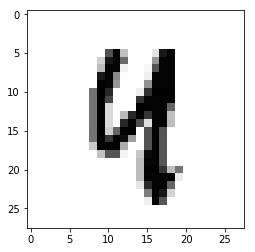

In [29]:
test(1413)

神經網路判斷為: 2


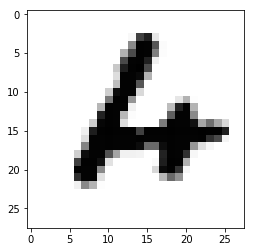

In [28]:
test(3780)